In [ ]:
%pip install -q -U bitsandbytes transformers peft accelerate datasets scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 71.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are i

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
import torch
import transformers
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments
from peft import prepare_model_for_kbit_training, LoraConfig, get_peft_model, PeftModel



model_name = "mistralai/Mixtral-8x7B-Instruct-v0.1"
new_model = "squad2/mistral8x7B"

tokenizer = AutoTokenizer.from_pretrained(model_name)

model = AutoModelForCausalLM.from_pretrained(model_name,
                                            load_in_4bit=True,
                                            torch_dtype=torch.float16,
                                            device_map="auto")
tokenizer.pad_token = tokenizer.eos_token

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/720 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors.index.json:   0%|          | 0.00/92.7k [00:00<?, ?B/s]

model-00001-of-00019.safetensors:   0%|          | 0.00/4.89G [00:00<?, ?B/s]

model-00002-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00003-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00004-of-00019.safetensors:   0%|          | 0.00/4.90G [00:00<?, ?B/s]

model-00005-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00006-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00007-of-00019.safetensors:   0%|          | 0.00/4.90G [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
model

In [ ]:
def extract_answer(prompt):
    answer_marker = "### ANSWER\n"
    # end_marker = "</s>"

    start_pos = prompt.find(answer_marker) + len(answer_marker)
    # end_pos = prompt.find(end_marker, start_pos)

    answer = prompt[start_pos:len(prompt)].strip()

    return answer

In [ ]:
from datasets import load_dataset

qa_dataset = load_dataset("squad_v2")
def create_prompt(context, question, answer):
    if len(answer["text"]) < 1:
        answer = "Cannot Find Answer"
    else:
        answer = answer["text"][0]
    prompt_template = f"### CONTEXT\n{context}\n\n### QUESTION\n{question}\n\n### ANSWER\n{answer}</s>"
    return prompt_template

mapped_qa_dataset = qa_dataset.map(lambda samples: tokenizer(create_prompt(samples['context'], samples['question'], samples['answers'])))
mapped_qa_dataset

In [ ]:
preds=[]
for i in range (0,10):
  input_ids = torch.tensor([mapped_qa_dataset["validation"][i]["input_ids"]])  # Add batch dimension
  print("Round: ",i)
  output = model.generate(
      input_ids=input_ids,  # Use the batched input
      max_new_tokens=128,
      do_sample=True,
      top_p=0.95,
      top_k=60,
      num_return_sequences=1,
  )
  ans=extract_answer(tokenizer.batch_decode(output, skip_special_tokens=True)[0])
  print("my ",ans)
  if(ans.find("Cannot Find Answer")!=-1):
    ans=""
    prob=1.
  else:
    prob=0.
  temp={'prediction_text': ans, 'id':[mapped_qa_dataset["validation"][i]["id"]] , 'no_answer_probability': prob }
  preds.append(temp)

In [ ]:
print(preds)

In [ ]:
references = []

for i in range (0,10):
  print("Round: ",i)
  temp={'answers': mapped_qa_dataset["validation"][i]["answers"], 'id':[mapped_qa_dataset["validation"][i]["id"]] }
  references.append(temp)


In [ ]:
input_ids = torch.tensor([mapped_qa_dataset["validation"][1]["input_ids"]])  # Add batch dimension

output = model.generate(
    input_ids=input_ids,  # Use the batched input
    max_new_tokens=128,
    do_sample=True,
    top_p=0.95,
    top_k=60,
    num_return_sequences=1,
)
t=extract_answer(tokenizer.batch_decode(output, skip_special_tokens=True)[0])
print(tokenizer.batch_decode(output, skip_special_tokens=True))
print(t)

In [ ]:
!pip install evaluate

In [ ]:
def adjust_prediction_format(predictions):
    for pred in predictions:
        if isinstance(pred['id'], list):
            pred['id'] = pred['id'][0]  # Convert list to single string
    return predictions

In [ ]:
adjusted_predictions = adjust_prediction_format(preds)
adjref=adjust_prediction_format(references)

In [ ]:
import evaluate
metric = evaluate.load("squad_v2")

In [ ]:
results = metric.compute(predictions=adjusted_predictions,references=adjref,no_answer_threshold=1.)
print(results)

In [ ]:
!pip install matplotlib


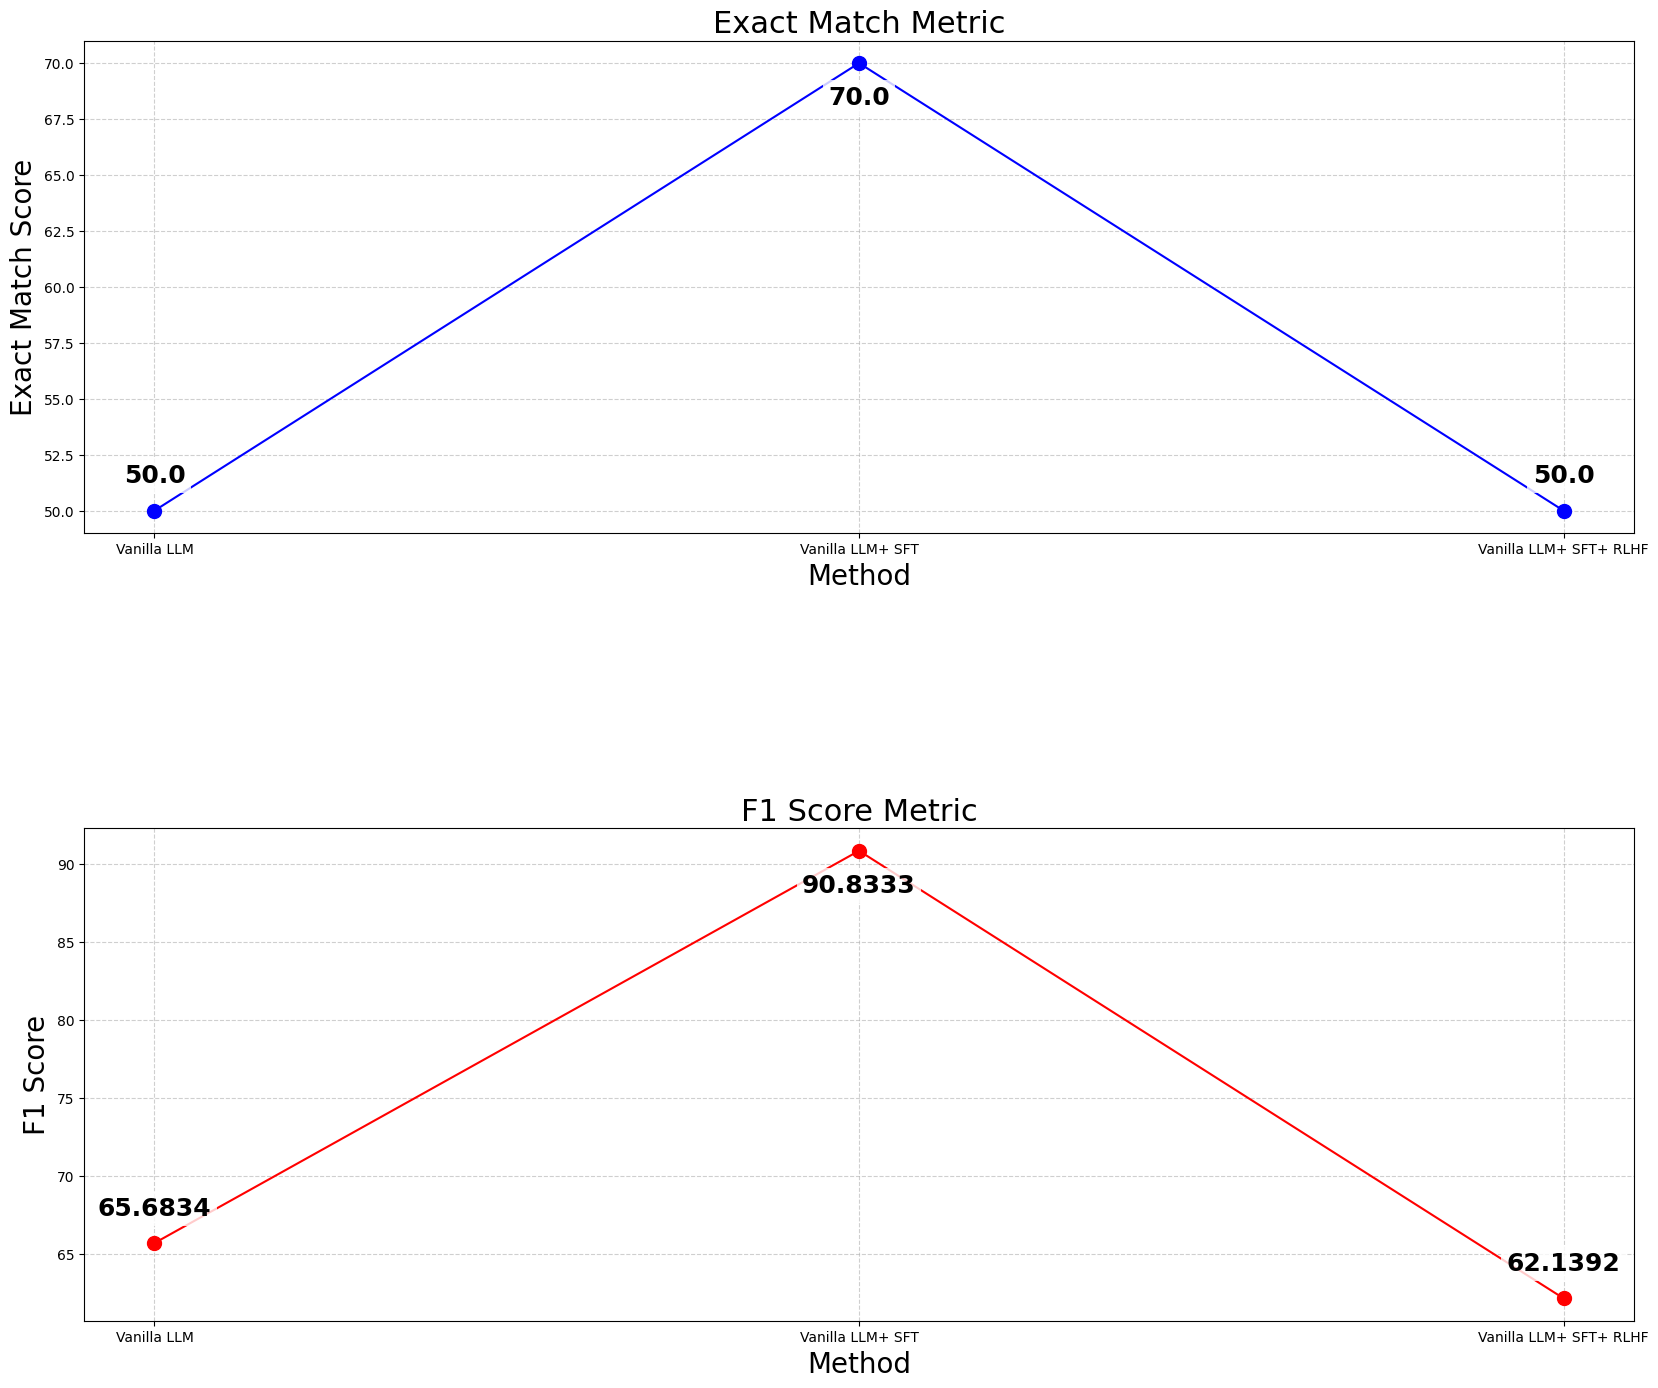

In [ ]:
import matplotlib.pyplot as plt


methods = ['Vanilla LLM', 'Vanilla LLM+ SFT', 'Vanilla LLM+ SFT+ RLHF']
exact_match_scores = [50.0, 70.0, 50.0]
f1_scores = [65.6834, 90.8333, 62.1392]


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 16))

# Plot Exact Match scores
ax1.plot(methods, exact_match_scores, marker='o', linestyle='-', color='b', markersize=10)
for i, txt in enumerate(exact_match_scores):
    if i == 0 or i==2:  # For the middle point, place the label above
        ax1.annotate(f"{txt}", (methods[i], exact_match_scores[i]), textcoords="offset points", xytext=(0,20), ha='center', fontsize=18, color='black', weight='bold', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
    else:  # For the side points, place the label below
        ax1.annotate(f"{txt}", (methods[i], exact_match_scores[i]), textcoords="offset points", xytext=(0,-30), ha='center', fontsize=18, color='black', weight='bold', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
ax1.set_title('Exact Match Metric', fontsize=22)
ax1.set_xlabel('Method', fontsize=20)
ax1.set_ylabel('Exact Match Score', fontsize=20)
ax1.grid(True, linestyle='--', alpha=0.6)

# Plot F1 scores
ax2.plot(methods, f1_scores, marker='o', linestyle='-', color='r', markersize=10)
for i, txt in enumerate(f1_scores):
    if i == 0 or i==2:  # For the middle point, place the label above
        ax2.annotate(f"{txt:.4f}", (methods[i], f1_scores[i]), textcoords="offset points", xytext=(0,20), ha='center', fontsize=18, color='black', weight='bold', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
    else:  # For the side points, place the label below
        ax2.annotate(f"{txt:.4f}", (methods[i], f1_scores[i]), textcoords="offset points", xytext=(0,-30), ha='center', fontsize=18, color='black', weight='bold', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
ax2.set_title('F1 Score Metric', fontsize=22)
ax2.set_xlabel('Method', fontsize=20)
ax2.set_ylabel('F1 Score', fontsize=20)
ax2.grid(True, linestyle='--', alpha=0.6)

# Adjust layout to prevent collision
plt.subplots_adjust(hspace=0.6, top=0.9, bottom=0.1)

# Show the plot
plt.show()
